In [1]:
from pathlib import Path
import lsstypes as types
from clustering_statistics.tools import get_stats_fn

stats_dir = Path('/global/cfs/cdirs/desi/mocks/cai/LSS/DA2/mocks/desipipe')

## Holi mocks v1

In [2]:
fn = get_stats_fn(stats_dir=stats_dir, kind='mesh2_spectrum', version='holi-v1-altmtl', tracer='LRG',
                  zrange=(0.4, 0.6), region='GCcomb', weight='default_FKP', imock=459)
fn

PosixPath('/global/cfs/cdirs/desi/mocks/cai/LSS/DA2/mocks/desipipe/holi-v1-altmtl/mesh2_spectrum_poles_LRG_z0.4-0.6_GCcomb_default_FKP_459.h5')

In [3]:
spectrum = types.read(fn)
print(spectrum, f"with k-average: {spectrum.get(ells=0).coords('k')}")

Mesh2SpectrumPoles(labels=[{'ells': 0}, {'ells': 2}, {'ells': 4}], size=1254) with k-average: [0.         0.00158216 0.00257437 0.00350089 0.00453571 0.005505
 0.0064685  0.00753006 0.00846034 0.00944034 0.01044992 0.01147719
 0.01251408 0.01352767 0.01452492 0.01550576 0.01650614 0.01749741
 0.01847575 0.01946183 0.02048392 0.02149681 0.02247801 0.02350894
 0.02451968 0.02548584 0.02648757 0.02749224 0.02849052 0.02948953
 0.03050037 0.03150198 0.03249394 0.03350734 0.03451511 0.03550646
 0.03650478 0.03750108 0.03850312 0.03949886 0.04049062 0.04149582
 0.04250629 0.04351068 0.04450394 0.04549905 0.04650836 0.04751106
 0.04849677 0.0494962  0.05050318 0.05150135 0.05250725 0.05350968
 0.05450168 0.05549592 0.05649516 0.0574972  0.05850652 0.05950274
 0.06050596 0.06150776 0.06250605 0.06350608 0.06450504 0.06550948
 0.06649948 0.06749584 0.06849518 0.06950311 0.07050201 0.07150105
 0.07250796 0.07350524 0.07450288 0.075505   0.07650112 0.07749599
 0.07849937 0.07950575 0.08050952 0.0

In [4]:
spectrum = spectrum.select(k=slice(0, None, 5))  # rebin to dk = 0.005 h/Mpc
spectrum = spectrum.select(k=(0., 0.4))  # select k-range
spectrum = spectrum.get(ells=[0, 2])  # monopole and quadrupole

for ell in spectrum.ells:
    pole = spectrum.get(ell)
    pole.coords('k')  # k-modes
    pole.value()  # value of the power spectrum multipole
    #print(pole.values('shotnoise'))  # shotnoise

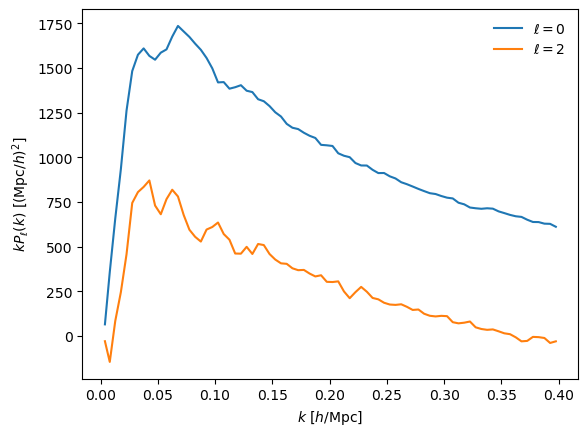

In [5]:
spectrum.plot(show=True);

In [6]:
# Do not forget the 'basis' argument
fn = get_stats_fn(stats_dir=stats_dir, kind='mesh3_spectrum', basis='sugiyama-diagonal', version='holi-v1-altmtl', tracer='LRG',
                  zrange=(0.4, 0.6), region='GCcomb', weight='default_FKP', imock=459)
bispectrum = types.read(fn)
bispectrum

Mesh3SpectrumPoles(labels=[{'ells': (0, 0, 0)}, {'ells': (2, 0, 2)}], size=82)

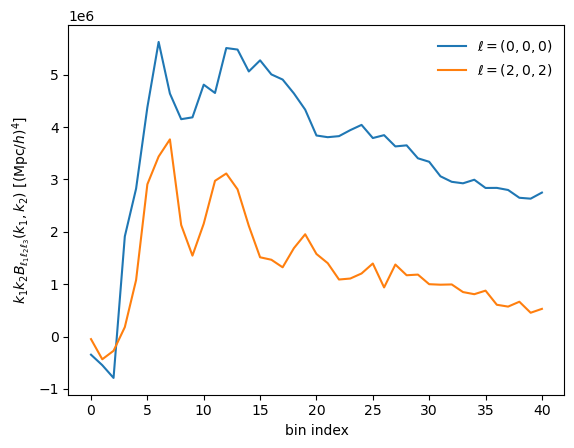

In [7]:
bispectrum.plot(show=True);

In [8]:
# All available mocks
fns = [get_stats_fn(stats_dir=stats_dir, kind='mesh2_spectrum', version='holi-v1-altmtl', tracer='LRG',
                  zrange=(0.4, 0.6), region='GCcomb', weight='default_FKP', imock=imock) for imock in range(1000)]
fns = [fn for fn in fns if fn.exists()]
print(len(fns))

221


In [9]:
covariance = types.cov([types.read(fn) for fn in fns])  # estimate covariance matrix

In [10]:
covariance = covariance.at.observable.match(spectrum)  # rebin to power spectrum
assert covariance.shape[0] == spectrum.size

In [11]:
covariance.value()  # to get covariance estimate

array([[ 1.35867341e+08,  5.45403273e+07,  1.06334250e+07, ...,
         7.14871876e+03,  2.40540124e+04,  1.05659071e+04],
       [ 5.45403273e+07,  6.82604869e+07,  1.73836625e+07, ...,
         2.51400267e+04,  5.02534622e+03,  1.13127524e+04],
       [ 1.06334250e+07,  1.73836625e+07,  3.19454457e+07, ...,
         2.69542267e+03, -4.26431915e+03,  3.02213552e+03],
       ...,
       [ 7.14871876e+03,  2.51400267e+04,  2.69542267e+03, ...,
         9.62464865e+02,  5.06514413e+02,  2.05438233e+02],
       [ 2.40540124e+04,  5.02534622e+03, -4.26431915e+03, ...,
         5.06514413e+02,  8.99301767e+02,  5.45772081e+02],
       [ 1.05659071e+04,  1.13127524e+04,  3.02213552e+03, ...,
         2.05438233e+02,  5.45772081e+02,  1.04620919e+03]])

## Abacus 2ndgen mocks

In [12]:
# 25 of them
fn = get_stats_fn(stats_dir=stats_dir, kind='mesh2_spectrum', version='abacus-2ndgen-complete', tracer='LRG',
                  zrange=(0.4, 0.6), region='NGC', weight='default_FKP', imock=12)

In [13]:
types.read(fn)

Mesh2SpectrumPoles(labels=[{'ells': 0}, {'ells': 2}, {'ells': 4}], size=1254)

In [14]:
# Window matrix
fn = get_stats_fn(stats_dir=stats_dir, kind='window_mesh2_spectrum', version='abacus-2ndgen-complete', tracer='LRG',
                  zrange=(0.4, 0.6), region='NGC', weight='default_FKP', imock=0)
window = types.read(fn)

In [15]:
window.observable

Mesh2SpectrumPoles(labels=[{'ells': 0}, {'ells': 2}, {'ells': 4}], size=1254)

In [16]:
window = window.at.observable.match(spectrum)  # match observed power spectrum
assert window.shape[0] == spectrum.size

In [17]:
window = window.at.theory.select(k=(0, 0.3))
for pole in window.theory:
    pole.coords('k')  # theory k's
window.value()  # window matrix 2D array
zeff = window.observable.get(ells=0).attrs['zeff']